In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'DejaVu Sans', 'serif': ['Computer Modern'], 'size':15})
rc('figure', facecolor='w')
import astropy.io.fits as fits
from astropy.io import ascii
import math, os

from calibration import read_data, emission, centroid

#optional dependencies
from distutils.spawn import find_executable
if find_executable('latex'): rc('text', usetex=True)
else: rc('text', usetex=False)

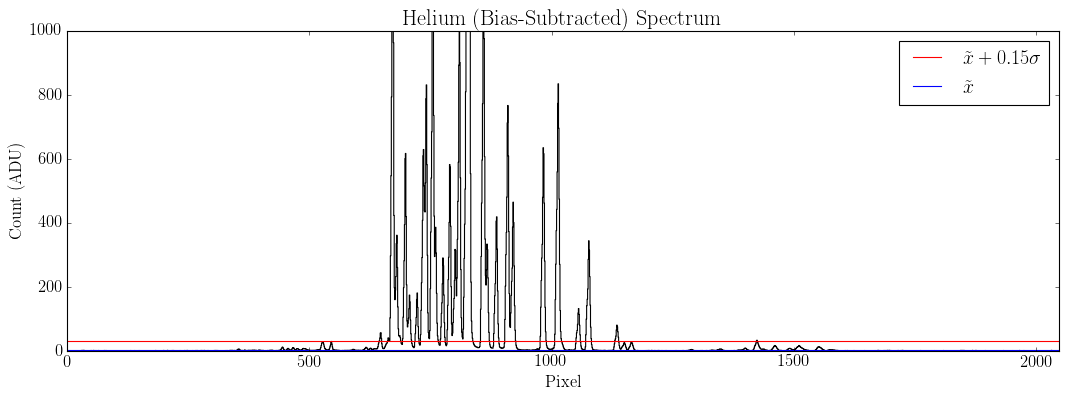

In [141]:
data = read_data('/home/jess/Desktop/Academic/PHYS164/lab2/bias_subtracted/neonbs.txt')
emiss = emission(data, thres=.15, ylim=[0,1000], title='Helium (Bias-Subtracted) Spectrum', \
                 save='writeup/plots/oceanlab_helium_thres.png')

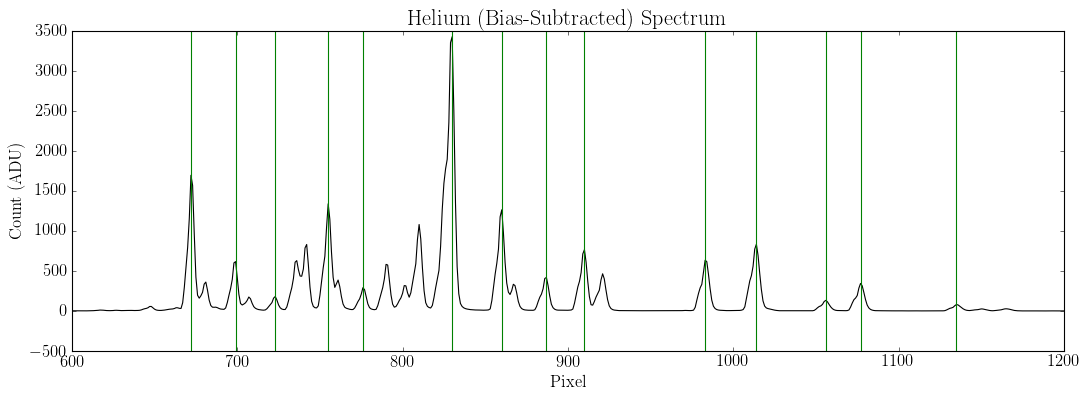

In [142]:
cent = centroid(data, emiss, xlim=[600,1200], title='Helium (Bias-Subtracted) Spectrum', \
               save='writeup/plots/oceanlab_helium_centroids.png')

In [105]:
# for c in cent:
#     print(data[1][c])

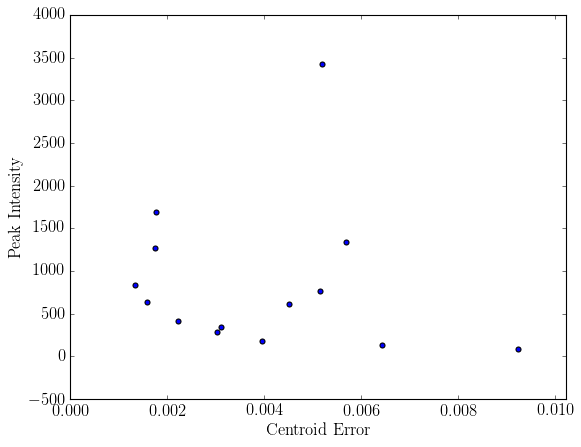

In [138]:
#Produces float values for the centroids, calculating their error and width
centroids, errors, widths, intensities = [], [], [], []
for i in np.arange(len(cent)):
    inte = []
    for a in emiss[i]:
        inte.append(data[1][a])
    centr_f = sum(emiss[i]*inte)/sum(inte)
    err_f = sum(inte*((emiss[i]-centr_f)**2))/(sum(inte))**2
    width_f = sum(inte*((emiss[i]-centr_f)**2))/sum(inte)
    
    centroids.append(centr_f)
    errors.append(err_f)
    widths.append(width_f)
    intensities.append(max(data[1][emiss[i]]))
    
plt.scatter(errors, intensities)
plt.xlim(0, max(errors)+.001)
plt.xlabel('Centroid Error')
plt.ylabel('Peak Intensity')
plt.show()

In [120]:
he_cal = pd.read_csv('wavecal/helium.csv')
ne_cal = pd.read_csv('wavecal/neon.csv')
comb_cal = pd.read_csv('wavecal/combined.csv') 

he_arr = np.array([np.array(he_cal['spec_pixel']), np.array(he_cal['nist_wave'])])
ne_arr = np.array([np.array(ne_cal['spec_pixel']), np.array(ne_cal['nist_wave'])])
comb_arr = np.array([np.array(comb_cal['spec_pixel']), np.array(comb_cal['nist_wave'])])

[m,c] = linear_regression(comb_arr[0], comb_arr[1])
print(m,c)

0.35685225749375427 344.216061753762


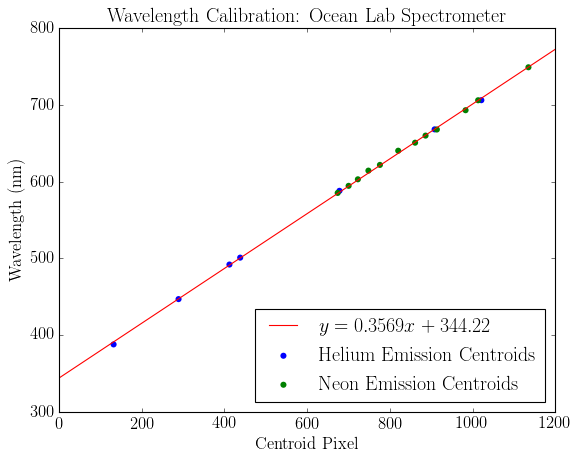

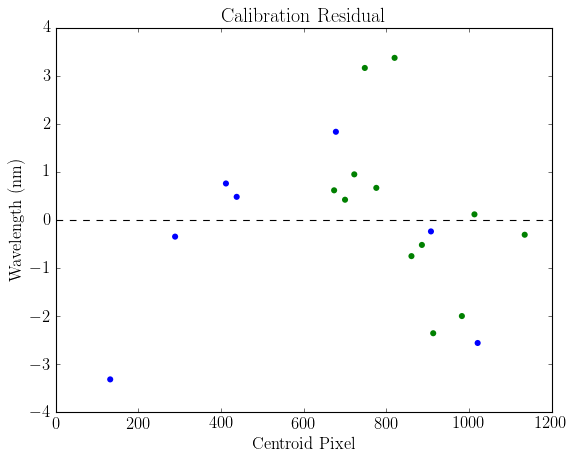

In [122]:
#==============
#Plot wavelength fit

xarr = np.arange(0,1200)
yarr = m*xarr + c

plt.scatter(he_arr[0], he_arr[1], color='b', edgecolor='none', s=30, label='Helium Emission Centroids')
plt.scatter(ne_arr[0], ne_arr[1], color='g', edgecolor='none', s=30, label='Neon Emission Centroids')
plt.plot(xarr, yarr, color='r', label='$y=%s x + %s$'%(np.round(m,4), np.round(c,2)))

plt.xlim(xarr[0], xarr[-1])
plt.xlabel('Centroid Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Calibration: Ocean Lab Spectrometer')
plt.legend(loc='lower right', scatterpoints=1)
plt.savefig('writeup/plots/oceanlab_wavecal.png')
plt.show()

#==============
#Plot residuals
he_fit = m*he_arr[0] + c
ne_fit = m*ne_arr[0] + c

plt.scatter(he_arr[0], he_arr[1] - he_fit, color='b', edgecolor='none', s=30)
plt.scatter(ne_arr[0], ne_arr[1] - ne_fit, color='g', edgecolor='none', s=30)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('Centroid Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Calibration Residual')
plt.savefig('writeup/plots/oceanlab_residual.png')
plt.show()

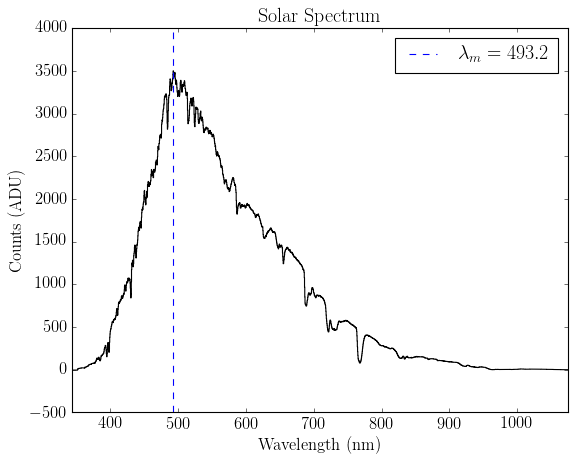

In [84]:
sp = read_data('bias_subtracted/sunbs.txt')
sp_wave = m*sp[0]+c
sp_flux = sp[1]

wave_max = sp_wave[np.where(sp_flux == max(sp_flux))[0][0]]

plt.step(sp_wave, sp_flux, color='k')
plt.axvline(wave_max, linestyle='--', label=r'$\lambda_m=%s$'%(np.round(wave_max,2)))
plt.xlim(min(sp_wave), max(sp_wave))
plt.title('Solar Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Counts (ADU)')
plt.legend(loc='upper right')
plt.savefig('writeup/plots/oceanlab_solar.png')
plt.show()

In [66]:
3*10**(-3)/(493*10**(-9))

6085.192697768763

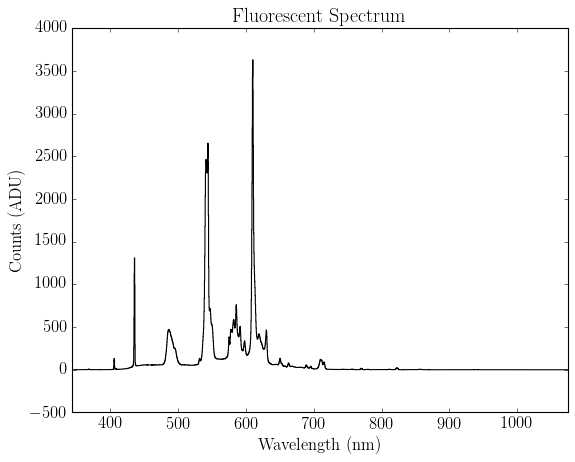

In [85]:
sp = read_data('bias_subtracted/flourescentbs.txt')
sp_wave = m*sp[0]+c
sp_flux = sp[1]

plt.step(sp_wave, sp_flux, color='k')
plt.xlim(min(sp_wave), max(sp_wave))
plt.title('Fluorescent Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Counts (ADU)')
plt.savefig('writeup/plots/oceanlab_fluorescent.png')
plt.show()

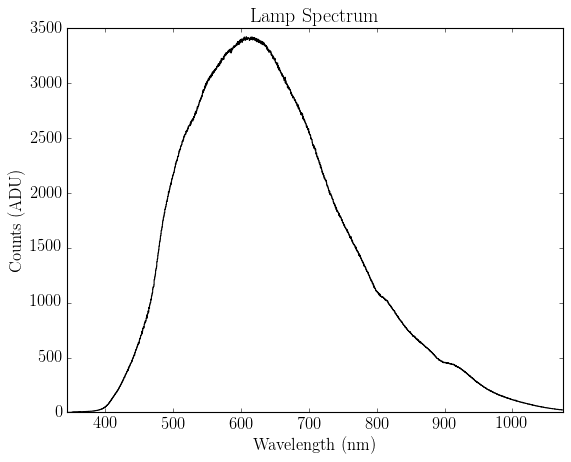

In [86]:
sp = read_data('bias_subtracted/lampbs.txt')
sp_wave = m*sp[0]+c
sp_flux = sp[1]

plt.step(sp_wave, sp_flux, color='k')
plt.xlim(min(sp_wave), max(sp_wave))
plt.title('Lamp Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Counts (ADU)')
plt.savefig('writeup/plots/oceanlab_lamp.png')
plt.show()

In [87]:
min(sp_wave), max(sp_wave)

(343.49360865290055, 1074.8525776092144)